# <center> Fall 2021 CS559: Homework #1 </center>

### <center> Due: **9/23/2021 Thursday 11:59 PM** </center>



- Before you start, rename the file as *LastNameFirstName*_F21_CS559_HW1 (e.g., JangInsuk_F21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [20 pts]
This problem task to implement functions of matrix operations - multiplication and tranpose. Please do not use numpy matrix packages in implementations.  

1-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

### Author: Jon Cucci
#### I pledge my honor that I have abided by the Stevens Honor System.

In [2]:
import numpy as np

In [3]:
### Code Starts Here
def mat_product(A,B):
    
    n = len(A)
    result = []
    
    for i in range(n):
        index = []
        for j in range(n):
            temp_result = 0
            for k in range(n):
                temp_result += A[i][k] * B[k][j]
            index.append(temp_result)
        result.append(index)
    
    return np.array(result)

In [4]:
# 2x2 Matrix Product
#
# Correct output:
# 19 22
# 43 50

mat_product(
              [[1, 2],
               [3, 4]],
              [[5, 6],
               [7, 8]]
             )

array([[19, 22],
       [43, 50]])

In [5]:
# 3x3 Matrix Product
#
# Correct output:
# 177 149 100
# 149 133 102
# 19  19  16

mat_product(
              [[3, 12, 4],
               [5, 6, 8],
               [1, 0, 2]],
              [[7, 3, 8],
               [11, 9, 5],
               [6, 8, 4]]
             )

array([[177, 149, 100],
       [149, 133, 102],
       [ 19,  19,  16]])

1-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [2 pts]

In [6]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(10, size=[3, 3])
Y=np.random.randint(10, size=[3, 3])

In [7]:
mat_product(X,Y)

array([[26, 36,  6],
       [37, 36,  9],
       [ 6, 63,  3]])

1-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [10 pts]


In [8]:
### Code Starts Here
def mat_transpose(X):
    
    n = len(X)
    result = [[0]*n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            result[i][j] = X[j][i]
    return result
        
print(X)
mat_transpose(X)

[[2 2 6]
 [1 3 9]
 [6 1 0]]


[[2, 1, 6], [2, 3, 1], [6, 9, 0]]

In [9]:
Z=mat_product(mat_transpose(X),Y)
print(Z)

[[ 26  27   3]
 [  6  45   9]
 [  6 135  27]]


In [10]:
### Code np.matmul() starts here
Z= np.matmul(np.transpose(X), Y)
print(Z)

[[ 26  27   3]
 [  6  45   9]
 [  6 135  27]]


### Problem 2 [20 pts]
2-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". 
   

In [15]:
### Code Starts Here
import pandas as pd
import numpy as np
def coin_prob(pi,n,k):
    
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    
    ProbTable=pd.DataFrame(columns = ['t', 's'])
    for t in range(50, 10001, 50):
        
        x = np.random.binomial(n, pi, t)
        s = [np.equal(x,i).mean() for i in range(n)]
        
        ProbTable = ProbTable.append({
            't': t, 
            's' : s[k-1]}, ignore_index=True)

    return(ProbTable)

#coin_prob(0.5 , 10, 5)

2-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [5 pts]

In [16]:
one_coins=coin_prob(pi=.5,n=1,k=1)
one_coins

,t,s
0,50.0,0.380000
1,100.0,0.520000
2,150.0,0.506667
3,200.0,0.545000
4,250.0,0.484000
...,...,...
195,9800.0,0.501020
196,9850.0,0.496244
197,9900.0,0.501414
198,9950.0,0.494874


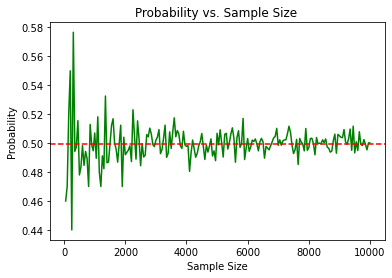

Experimental P: 0.49944611487640905
Theoretical P: 0.5


In [193]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coins.t, one_coins.s, 'g-')
plt.axhline(y=one_coins.s.mean(), color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability vs. Sample Size ')
plt.show()
print("Experimental P: "+ str(one_coins.s.mean()))
print("Theoretical P: 0.5")

2-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [5 pts]

In [194]:
### Code starts here
from math import factorial as fact
k = 1
n = 3
output = (((fact(n) / (fact(k) * fact(n - k)))) / 2 ** n)/ n
print(output)

0.125


2-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [195]:
three_coins=coin_prob(pi=.5,n=3,k=1)

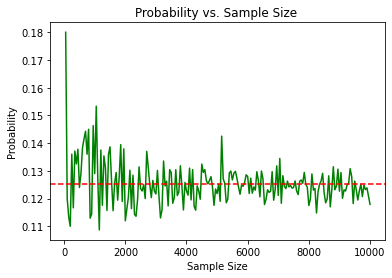

Experimental P: 0.12540147400272952
Theoretical P: 0.125


In [196]:
"""Plot shows here"""
import matplotlib.pyplot as plt

plt.plot(three_coins.t, three_coins.s, 'g-')
plt.axhline(y=three_coins.s.mean(), color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability vs. Sample Size ')
plt.show()
print("Experimental P: "+ str(three_coins.s.mean()))
print("Theoretical P: 0.125")

### Problem 3 [20 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [197]:
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')

3-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [198]:
### Code Starts Here

'''
Merges Countries by country code, then changes GDP to INT values
'''
Country_GDP = pd.merge(gdp, Country, on="CountryCode")
Country_GDP['GDP'] = Country_GDP.iloc[:,3].str.replace(',', '').astype(float)
Country_GDP

,CountryCode,Rank,CountryName,GDP,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,USA,1,United States,16244600.0,United States of America,High income: OECD,North America,NaN,NaN,U.S. dollar,...,LFS 2000,Yes,1997/2002,2004.0,2008.0,2000.0,US,US,United States,United States
1,CHN,2,China,8227103.0,People's Republic of China,Lower middle income,East Asia & Pacific,IBRD,NaN,Chinese yuan,...,"IHS, 2005",NaN,1997,2005.0,2008.0,2000.0,CN,CN,China,China
2,JPN,3,Japan,5959718.0,Japan,High income: OECD,East Asia & Pacific,NaN,NaN,Japanese yen,...,"IS, 1993",Yes,2000,2004.0,2008.0,2000.0,JP,JP,Japan,Japan
3,DEU,4,Germany,3428131.0,Federal Republic of Germany,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"IHS, 2000",Yes,1999-2000,2004.0,2008.0,2000.0,DE,DE,Germany,Germany
4,FRA,5,France,2612878.0,French Republic,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"ES/BS, 1994/95",Yes,1999-2000,2004.0,2008.0,2000.0,FR,FR,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,STP,186,São Tomé and Principe,263.0,Democratic Republic of São Tomé and Principe,Lower middle income,Sub-Saharan Africa,IDA,HIPC,São Tomé and Principe dobra,...,PS 2000-01,NaN,NaN,NaN,2008.0,NaN,ST,ST,São Tomé and Principe,São Tomé and Principe
185,PLW,187,Palau,228.0,Republic of Palau,Upper middle income,East Asia & Pacific,IBRD,NaN,U.S. dollar,...,NaN,Yes,NaN,NaN,NaN,NaN,PW,PW,Palau,Palau
186,MHL,188,Marshall Islands,182.0,Republic of the Marshall Islands,Lower middle income,East Asia & Pacific,IBRD,NaN,U.S. dollar,...,NaN,NaN,NaN,NaN,NaN,NaN,MH,MH,Marshall Islands,Marshall Islands
187,KIR,189,Kiribati,175.0,Republic of Kiribati,Lower middle income,East Asia & Pacific,IDA,NaN,Australian dollar,...,NaN,NaN,NaN,NaN,2005.0,NaN,KI,KI,Kiribati,Kiribati


In [199]:
### Print the number of IDs
'''
Prints length of uniques IDs found in coutnry codes
'''
num_IDs = len(pd.unique(Country_GDP['CountryCode']))
num_IDs

189

3-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

Europe & Central Asia has the most countries with 50


<AxesSubplot:xlabel='Region'>

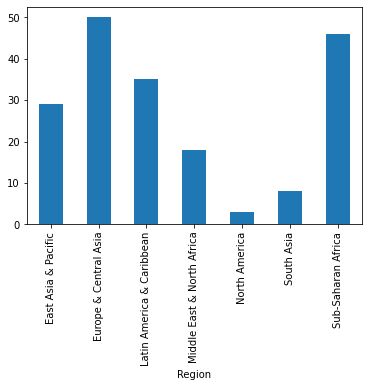

In [200]:
### Code Starts Here
'''
Firstly, grouped by region and then used a Pandas max function to find the highest number of individual countries.
Uses a reverse indexing to find out which is the Region
'''
regions = Country_GDP.groupby('Region').count()['CountryCode']
max = regions.apply(lambda row: row == regions.max())
print(str(max.index[max == True][0]) + " has the most countries with " + str(regions.max()))
regions.plot(kind='bar')

3-c: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

In [201]:
### Code Starts Here
from scipy.stats import ks_2samp, kstest
'''
Groups data by region, then Filters to get just GDP and lists it together.
From there, I made a KS2 table comparing each region against one another.
'''

Region_GDP = Country_GDP.groupby('Region')['GDP'].apply(list)
REGIONS = sorted(pd.unique(Country_GDP['Region']))

ks2_table = pd.DataFrame(columns = REGIONS, index = REGIONS)
for c1 in REGIONS:
    ks = []
    for c2 in REGIONS:
        r1, r2 = Region_GDP[c1], Region_GDP[c2]
        ks.append(tuple(map(lambda x: round(x, 6), ks_2samp(r1, r2))))
    ks2_table.loc[c1] = ks
        
ks2_table

,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
East Asia & Pacific,"(0.0, 1.0)","(0.37931, 0.006764)","(0.213793, 0.396412)","(0.496169, 0.004787)","(0.597701, 0.190323)","(0.344828, 0.358175)","(0.370315, 0.010559)"
Europe & Central Asia,"(0.37931, 0.006764)","(0.0, 1.0)","(0.305714, 0.033283)","(0.244444, 0.344964)","(0.566667, 0.224793)","(0.26, 0.646914)","(0.573043, 0.0)"
Latin America & Caribbean,"(0.213793, 0.396412)","(0.305714, 0.033283)","(0.0, 1.0)","(0.515873, 0.002319)","(0.638095, 0.124229)","(0.214286, 0.865937)","(0.325466, 0.021868)"
Middle East & North Africa,"(0.496169, 0.004787)","(0.244444, 0.344964)","(0.515873, 0.002319)","(0.0, 1.0)","(0.666667, 0.144361)","(0.444444, 0.171065)","(0.792271, 0.0)"
North America,"(0.597701, 0.190323)","(0.566667, 0.224793)","(0.638095, 0.124229)","(0.666667, 0.144361)","(0.0, 1.0)","(0.541667, 0.424242)","(0.666667, 0.091945)"
South Asia,"(0.344828, 0.358175)","(0.26, 0.646914)","(0.214286, 0.865937)","(0.444444, 0.171065)","(0.541667, 0.424242)","(0.0, 1.0)","(0.48913, 0.051218)"
Sub-Saharan Africa,"(0.370315, 0.010559)","(0.573043, 0.0)","(0.325466, 0.021868)","(0.792271, 0.0)","(0.666667, 0.091945)","(0.48913, 0.051218)","(0.0, 1.0)"


3-d: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [202]:
### Code Starts Here
income_groups = Country_GDP.groupby("Income Group")['GDP']
income_groups.agg(['mean', "std"])

,mean,std
Income Group,,
High income: OECD,1.483917e+06,3.070464e+06
High income: nonOECD,1.043498e+05,1.653344e+05
Low income,1.441078e+04,2.047309e+04
Lower middle income,2.566635e+05,1.139620e+06
Upper middle income,2.318478e+05,4.768720e+05


### Problem 4 - Clustering Using KMeans [20 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW1_Q1_0.csv` containing coordinates of x and y. 

4-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [2]:
import pandas as pd

In [3]:
### Code starts here
df = pd.read_csv('HW1_Q1_0.csv', header= None, encoding='ISO-8859-1')
df.columns = ['X', 'Y']
df

,X,Y
0,-0.452720,-0.018213
1,-0.169793,1.073745
2,1.128729,-2.395042
3,0.122506,-0.973069
4,-0.409200,0.129649
...,...,...
820,0.944727,0.365376
821,-0.161625,-0.358271
822,0.147787,0.905077
823,-0.159311,0.425800


4-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [4]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    n_cluster_range = range(1,n_cluster_range)
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

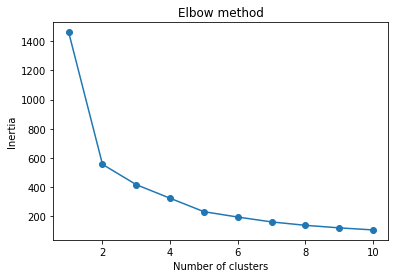

,Inertia
n = 1,1462.008530
n = 2,555.425223
n = 3,415.857905
n = 4,322.711913
n = 5,230.500209
n = 6,193.740859
n = 7,160.266558
n = 8,136.988969
n = 9,119.506464
n = 10,105.416047


In [5]:
### Code starts here
plot_inertia(kmeans, df, 11)

I would say my estimate is a K-value of 5, as it is the last time we see a significant change in slope.

4-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

<AxesSubplot:xlabel='X', ylabel='Y'>

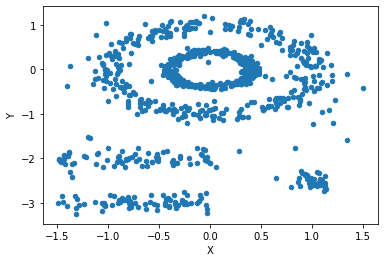

In [6]:
### Code starts here 
df.plot.scatter(x = 'X', y = 'Y')

After further graphing, I think my prediction of K = 5 is sustainable, as there are 5 pretty distinct groups being shown in the visualization.

4-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [7]:
### Code starts here
from sklearn.metrics import pairwise_distances
def MY_KMean(df, k, n, print_itr = False):
    
    rand_index = np.random.randint(0, len(df),k)
    centroids = df.iloc[rand_index]
    
    # Original attempt with my own math and code, very very slow.
    '''
    def euclidean_dist(df, centroids):
        distances = []
        for i in range(len(df)):
            pt_dist = []
            for j in range(len(centroids)):
                pt_dist.append(((df.iloc[i]['X'] - centroids.iloc[j]['X'])**2 + ((df.iloc[i]['Y'] - centroids.iloc[j]['Y'])**2))**0.5)
            distances.append(pt_dist)
        return np.array(distances), np.array([np.argmin(i) for i in distances])
    
    distances, mins = euclidean_dist(df, centroids)
    '''
    distances = pairwise_distances(df, centroids, metric = 'euclidean')
    mins = np.array([np.argmin(L) for L in distances])
                    
    for i in range(n):
        centroids = []
        for rand_index in range(k):
            t_centroid = df[mins == rand_index].mean(axis = 0)
            centroids.append(t_centroid)
        
        if print_itr == True:
            print(i)
         
        centroids = np.vstack(centroids)
        '''
        distances, mins = euclidean_dist(df, pd.DataFrame(centroids, columns = ['X', 'Y']))
        '''
    
        distances = pairwise_distances(df, centroids, metric = 'euclidean')
        mins = np.array([np.argmin(L) for L in distances])
    
    return mins

# MY_KMean(df, 5, 10)

## Testing

### Expectation
![Expectation](expectation.jpg)

### Reality

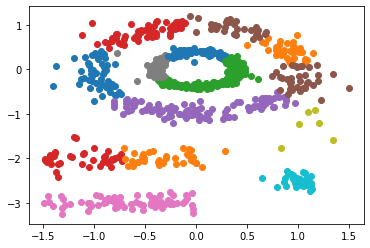

In [16]:
label = MY_KMean(df, 16, 1000)
labels = np.unique(label)
df_np = df.values
for i in labels:
    plt.scatter(df_np[label == i, 0], df_np[label == i, 1], label = i)
plt.show()

The expectation vs reality are vastly different because of the way that KMeans works, as we have it based off of clusters and centroids.

It is impossible to get the inner and outter ring separated from each other in an unsupervised learning method like this.

### Problem 5 - Principal Component Analysis [20 pts]

5-a. Run the following codes. 

In [210]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

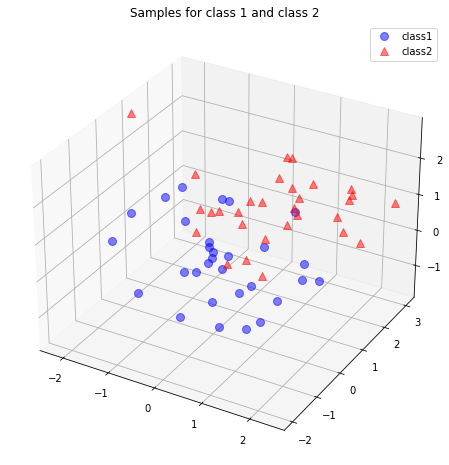

In [211]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

5-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [15 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 
7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [212]:
### Code starts here
# 5.1
'''
Take the dataset w/o classes. 
'''
data = np.concatenate((class1_sample, class2_sample), axis =1)

# 5.2
'''
Compute the d-dimentional mean vector.
'''
mean_vec = data.mean(axis = 1)
mean_vec

array([0.47343911, 0.52653958, 0.73360656])

In [213]:
# 5.3
'''
Compute the scatter matrix as following.
        𝐒=∑𝑘=1𝑁(𝐱𝑘−𝐱¯)(𝐱𝑘−𝐱¯)𝑇
where 𝐱¯ is the mean vector. Then compute the covariance matrix using np.cov() function.
'''

# s = [np.cov(np.matrix.transpose(np.array(data_T[k])-mean_vec), np.array(data_T[k])-mean_vec) for k in range(len(data_T))]

scatter_m = np.zeros((3,3))
for i in range(data.shape[1]):
    data_shape = data[:, i].reshape(3, 1)
    scatter_m = scatter_m + np.matmul((data_shape - mean_vec), (mat_transpose(data_shape - mean_vec)))
    
scatter_m

array([[203.23505008,  51.09910165,  27.48616931],
       [ 51.09910165, 221.92648831,  -1.36279063],
       [ 27.48616931,  -1.36279063, 227.88632359]])

In [214]:
# 5.3
covariance = np.cov([data[i] for i in range(len(data))])
covariance

array([[ 1.12432002,  0.27043376,  0.15901633],
       [ 0.27043376,  1.23833166, -0.01238244],
       [ 0.15901633, -0.01238244,  1.25001409]])

In [215]:
# 5.4
'''
Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
'''
e_val, e_vec = np.linalg.eig(scatter_m)
print(e_val)
print(e_vec)

[153.87748592 271.50715436 227.66322171]
[[-0.76160176  0.64729672 -0.0311402 ]
 [ 0.57777676  0.65647337 -0.48499147]
 [ 0.29349067  0.38736244  0.87396428]]


<ipython-input-216-1eb7d906d612>:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


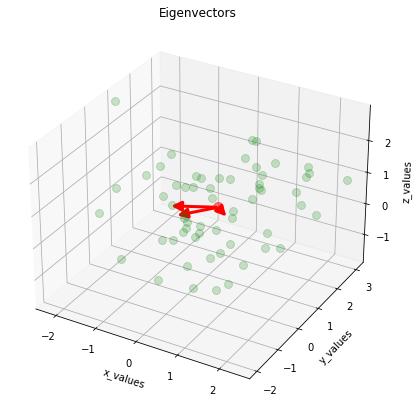

In [216]:
# 5.5
'''
Check the eigenvector and eigenvalue calculation. 
This code is provided as well as the visualization of eigenvectors.
'''

from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(data[0,:], data[1,:], data[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_vec[0]], [mean_vec[1]], [mean_vec[2]], 'o', markersize=10, color='red', alpha=0.5)
for v in e_vec.T:
    a = Arrow3D([mean_vec[0], v[0]], [mean_vec[1], v[1]], [mean_vec[2], v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [221]:
# 5.5
'''Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of 
eigenvectors.'''

for i in range(e_val.shape[0]):
    e_val_col = e_vec[:, i].reshape(1, 3).T
    assert (np.round(scatter_m.dot(e_val_col), decimals = 6) == np.round(e_vec[i]*e_val_col, decimals = 6)).all

In [222]:
# 5.6
'''Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes 
of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information 
about the distribution of the data.'''

pairs = []
for i in range(e_val.shape[0]):
    pairs.append((e_val[i], e_vec[:, i]))
pairs.sort(key=lambda n: n[0], reverse=True)
pairs

[(271.50715435912673, array([0.64729672, 0.65647337, 0.38736244])),
 (227.66322170532666, array([-0.0311402 , -0.48499147,  0.87396428])),
 (153.87748592265098, array([-0.76160176,  0.57777676,  0.29349067]))]

In [223]:
# 5.7
'''
Choose 𝑘 eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to 
a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to 
construct our 𝑑×𝑘-D eigenvector matrix 𝐖.
'''

two_d_mat = np.array([[pairs[0][1][i], pairs[1][1][i]] for i in range(len(pairs[0][1]))])
two_d_mat

array([[ 0.64729672, -0.0311402 ],
       [ 0.65647337, -0.48499147],
       [ 0.38736244,  0.87396428]])

In [224]:
# 5.8 
'''
Transform the samples onto the new subspace. The new subspace equation is
𝐲=𝐖𝑇×𝐱
'''
subspace = two_d_mat.T.dot(data)

5-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

In [225]:
from sklearn.decomposition import PCA

In [226]:
### Code starts here

pca = PCA(n_components=2)
trans = PCA.fit_transform(data.T)

TypeError: fit_transform() missing 1 required positional argument: 'X'